## Le code de chargement du fichier.

In [1]:
# compatibilité python 2 et python 3
from __future__ import division, print_function, unicode_literals

# imports
import numpy as np
import os

# stabilité du notebook d'une exécution à l'autre
np.random.seed(42)

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import scipy
import imageio
import pathlib
import cv2 as cv
 

In [2]:
image_paths_n = pathlib.Path('./dataset/Livrable1/Noisy').glob("*.jpg")
image_sorted_n = sorted([x for x in image_paths_n])
im_path_n = str(image_sorted_n[1])
im_n = imageio.imread(im_path_n)

image_paths_b = pathlib.Path('./dataset/Livrable1/Blurry').glob("*.jpg")
image_sorted_b = sorted([x for x in image_paths_b])
im_path_b = str(image_sorted_b[1])
im_b = imageio.imread(im_path_b)

def load_image(image):
    return imageio.imread(image)


## Le code du débruitage sur un sous-ensemble d’images bruitées.

<function matplotlib.pyplot.show(close=None, block=None)>

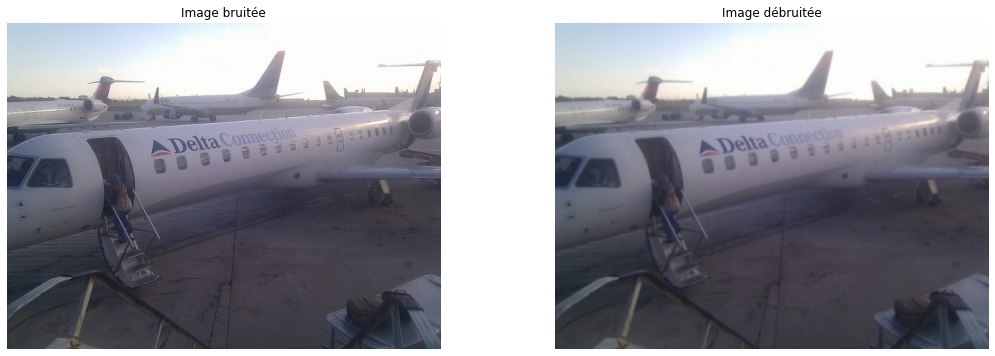

In [3]:

blurred_im_n = cv.GaussianBlur(im_n,(5,5),0)


plt.figure(figsize=(18,6))

plt.subplot(121)
plt.imshow(im_n)
plt.axis('off')
plt.title("Image bruitée")

plt.subplot(122)
plt.imshow(blurred_im_n)
plt.axis('off')
plt.title("Image débruitée")



plt.show


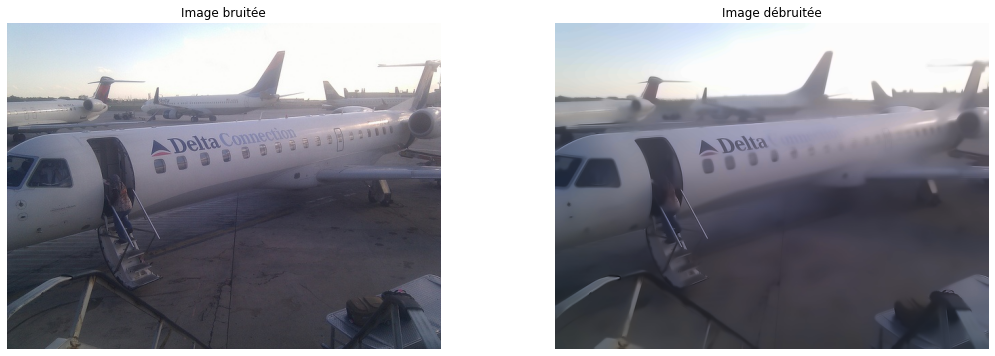

In [5]:
blurred_cv_n = cv.fastNlMeansDenoisingColored(im_n,None,10,10,7,21)
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.imshow(im_n)
plt.axis('off')
plt.title("Image bruitée")

plt.subplot(122)
plt.imshow(blurred_cv_n)
plt.axis('off')
plt.title("Image débruitée")

plt.show()

explication

## Le code de l’affutage sur un sous-ensembles d’images floutées.

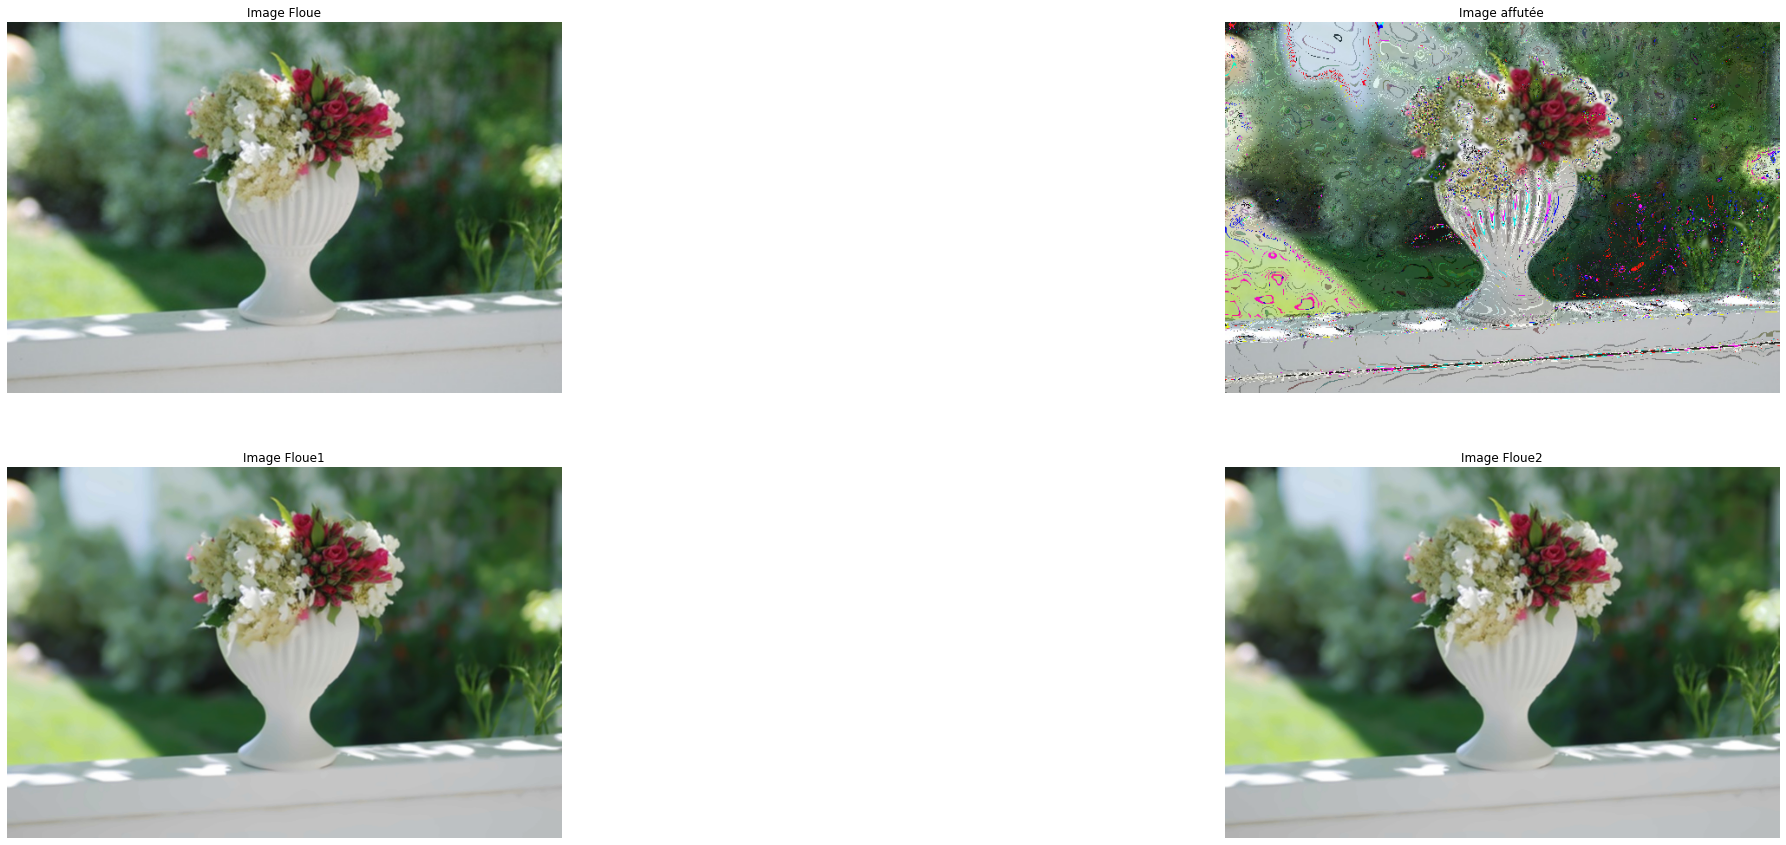

In [17]:
blurred_cv_b1 = cv.fastNlMeansDenoisingColored(im_b,None,3,0,7,21)
blurred_cv_b2 = cv.fastNlMeansDenoisingColored(im_b,None,2,0,7,21)

sharpened = im_b + 30*(blurred_cv_b1-blurred_cv_b2)

plt.figure(figsize=(40,15))
plt.subplot(221)
plt.imshow(im_b)
plt.axis('off')
plt.title("Image Floue")

plt.subplot(222)
plt.imshow(sharpened)
plt.axis('off')
plt.title("Image affutée")

plt.subplot(223)
plt.imshow(blurred_cv_b1)
plt.axis('off')
plt.title("Image Floue1")

plt.subplot(224)
plt.imshow(blurred_cv_b2)
plt.axis('off')
plt.title("Image Floue2")

plt.show()

explication du code

## Une étude de cas explicitant les compromis entre ces deux opérations. Cette partie du livrable doit inclure le bruitage d’images et montrer la perte de détails, ou l’affutage d’images et montrer l’apparition du bruit.

### Bruitage d'images

In [ ]:
#code commenté

### Affutage d'images

In [ ]:
#code commenté

### Explication des compromis

In [ ]:
#code commenté